Teste de Dickey-Fuller Aumentado:
Estatística de Teste: -0.3265
Valor-p: 0.9217
Valores Críticos:
   1%: -3.5079
   5%: -2.8954
   10%: -2.5848


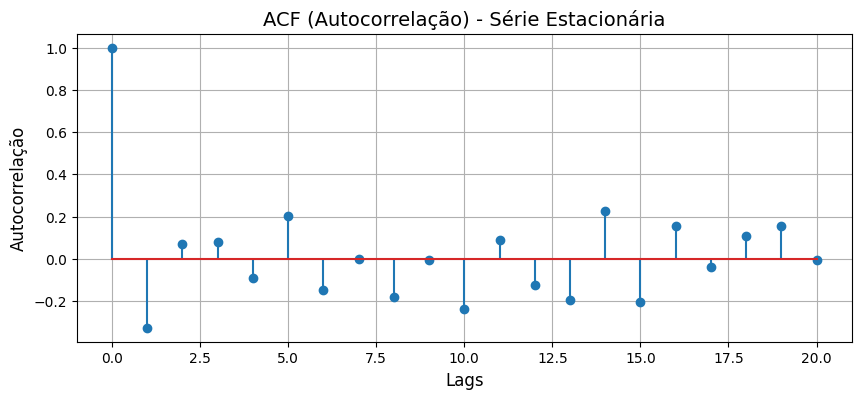

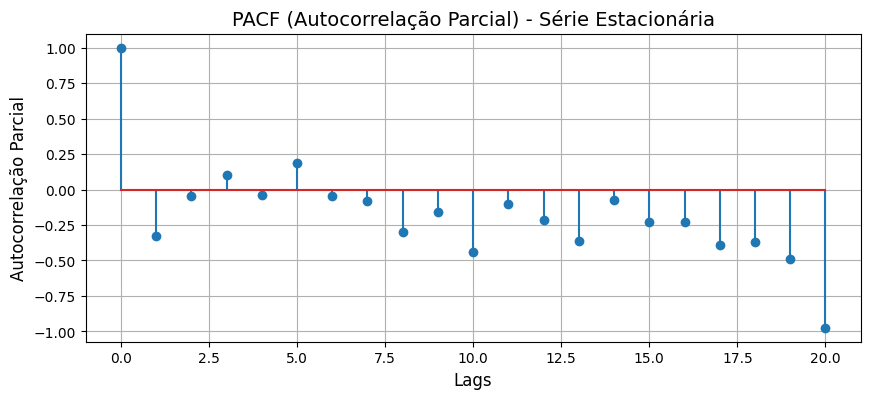

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Data_diff   No. Observations:                   89
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -268.232
Date:                            Mon, 18 Nov 2024   AIC                            546.464
Time:                                    01:19:23   BIC                            558.118
Sample:                                         0   HQIC                           551.121
                                             - 89                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3770      0.104     -3.634      0.000      -0.580      -0.174
ma.L1         -0.9999    118.248   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


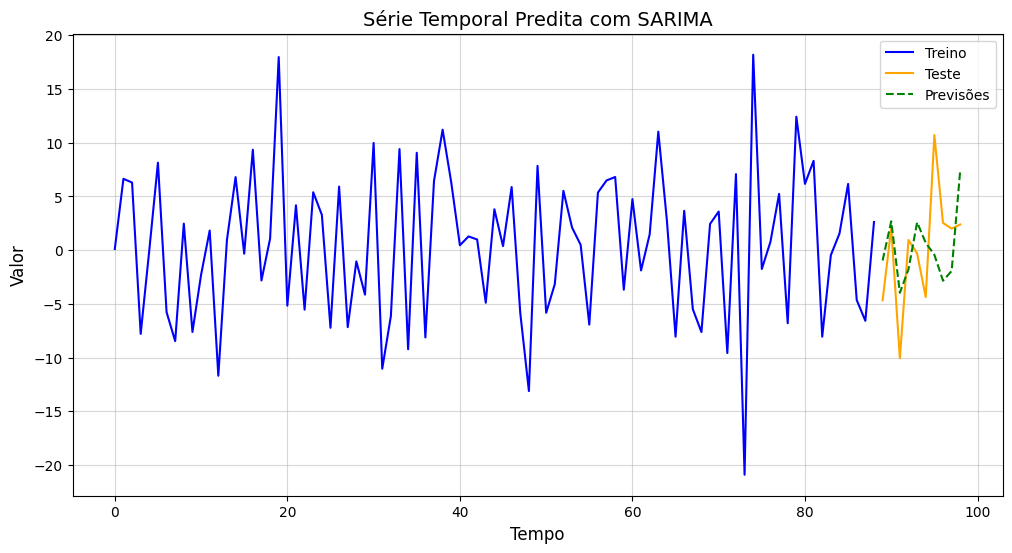

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Gerar uma série temporal fictícia
np.random.seed(42)
time = np.arange(1, 101)
data = 50 + 0.5 * time + 10 * np.sin(2 * np.pi * time / 20) + np.random.normal(0, 5, size=100)
df = pd.DataFrame({'Time': time, 'Data': data})

# 1. Verificar a estacionariedade da série
def test_stationarity(series):
    result = adfuller(series)
    print("Teste de Dickey-Fuller Aumentado:")
    print(f"Estatística de Teste: {result[0]:.4f}")
    print(f"Valor-p: {result[1]:.4f}")
    print(f"Valores Críticos:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    return result[1]

# Aplicar teste ADF
p_value = test_stationarity(df['Data'])

# Tornar a série estacionária, se necessário
if p_value > 0.05:
    df['Data_diff'] = df['Data'].diff()
    series_to_analyze = df['Data_diff'].dropna()
else:
    series_to_analyze = df['Data']

# 2. Identificar os parâmetros (p, d, q) e (P, D, Q, m)
acf_values = acf(series_to_analyze, nlags=20)
pacf_values = pacf(series_to_analyze, nlags=20)

# Plot ACF
plt.figure(figsize=(10, 4))
plt.stem(range(len(acf_values)), acf_values)
plt.title("ACF (Autocorrelação) - Série Estacionária", fontsize=14)
plt.xlabel("Lags", fontsize=12)
plt.ylabel("Autocorrelação", fontsize=12)
plt.grid()
plt.show()

# Plot PACF
plt.figure(figsize=(10, 4))
plt.stem(range(len(pacf_values)), pacf_values)
plt.title("PACF (Autocorrelação Parcial) - Série Estacionária", fontsize=14)
plt.xlabel("Lags", fontsize=12)
plt.ylabel("Autocorrelação Parcial", fontsize=12)
plt.grid()
plt.show()

# 3. Treinar o modelo SARIMA (usando valores arbitrários para p, d, q, P, D, Q, m)
p, d, q = 1, 1, 1  # Componentes regulares
P, D, Q, m = 1, 1, 1, 12  # Componentes sazonais, com sazonalidade de 12
train_data = series_to_analyze[:-10]  # Últimos 10 valores como teste
test_data = series_to_analyze[-10:]

model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit(disp=False)
print(model_fit.summary())

# 4. Avaliar o desempenho
predictions = model_fit.forecast(steps=10)
mae = mean_absolute_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)

print("\nAvaliação do Modelo SARIMA:")
print(f"Erro Absoluto Médio (MAE): {mae:.4f}")
print(f"Erro Médio Quadrático (MSE): {mse:.4f}")

# Gráfico da série temporal predita
plt.figure(figsize=(12, 6))
plt.plot(range(len(train_data)), train_data, label="Treino", color="blue")
plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label="Teste", color="orange")
plt.plot(range(len(train_data), len(train_data) + len(predictions)), predictions, label="Previsões", color="green", linestyle="--")
plt.title("Série Temporal Predita com SARIMA", fontsize=14)
plt.xlabel("Tempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()
